# 02 App

In [14]:
import matplotlib.pyplot as plt
import datapane as dp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

In [8]:
#data_dir = pathlib.Path('C:/Users/joana/projects/skin/01_data')

In [15]:
df = pd.read_csv('01_data/data.csv')

In [10]:
#%%writefile -a classifier.py

import matplotlib.pyplot as plt
import datapane as dp
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [28]:
def classifier(path):

    img = tf.keras.utils.load_img(
        path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    tf.get_logger().setLevel('ERROR')
    model = keras.models.load_model('03_models/model224_4.h5')
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    plt.imshow(img)
    
    
    class_names = ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
    
    return print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

In [29]:
path = ('01_data/AKIEC/'+df['image'][23])

1/1 [==============================] - 0s 119ms/step
This image most likely belongs to BKL with a 19.87 percent confidence.


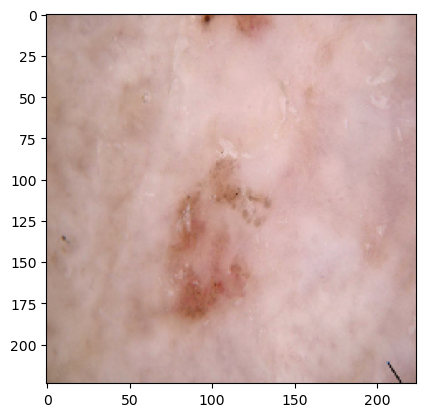

In [30]:
classifier(path)

In [34]:
path = ('01_data/BKL/'+df['image'][30])

1/1 [==============================] - 0s 111ms/step
This image most likely belongs to BKL with a 28.63 percent confidence.


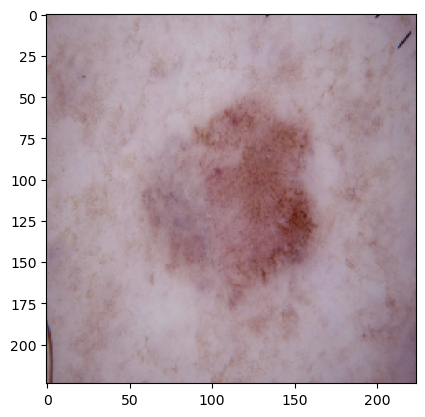

In [35]:
classifier(path)

In [32]:
df[df['BKL']==1]

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
6,ISIC_0024312.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18,ISIC_0024324.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,ISIC_0024336.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31,ISIC_0024337.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32,ISIC_0024338.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9985,ISIC_0034291.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9990,ISIC_0034296.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,ISIC_0034303.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10009,ISIC_0034315.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
